# Word2Vec

Wor2Vec, text metinlerinin numerik olarak temsil dilebilmesi için kullanılan bir yöntemdir.

Bag of Words, TF-IDF gibi metodlardan farklı olarak çalışır.

Kelimelerin vektörel olarak temsil edilmesidir.

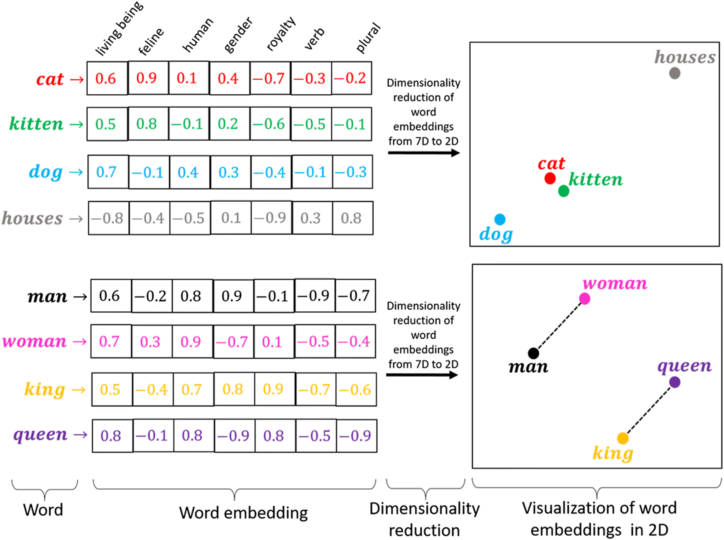

In [2]:
from IPython.display import Image
Image(filename='w2v1.png')

### Yukarıdaki görselin sol tarafında bu yöntemin 7 boyutlu bir uzayda nasıl temsil edilebileceği görülüyor:

Her kelime vektörü alt alta gelecek şekilde bir matris oluşturduğumuzu düşünürsek, her sütun bir kelimenin bir özelliğini temsil ediyor olacaktır.

Öreneğin **Cat** ve **Kitten** kelimeleri için:

* **living being**
* **feline (kedicil)**

özellikleri yakın değerlere sahiptir.

* **human**

özelliği insan olmadıkları için 0'a yakın bir değere sahiptir.

* **gender**

özelliği kelimeler cinsiyet belirtmediği için 0'a yakın değerlere sahiptir.

Bu kelimelere kıyasla **Dog** kelimesi:

* **living being** özelliği yüksek olurken, **feline** özelliği, kedi türü olmadığı için 0'a yakın bir değere sahiptir.

**Houses** kelimesi:

* **living being** özelliği için negatif bir değere sahiptir,
* **plural (çoğul kelime)** sütunu için yüksek bir değere sahiptir.

### Hemen Altındaki Matrise Bakacak Olursak:

* **man** ve **woman** kelimeleri cinsiyet sütununda zıt değerlere sahiptir.
* **king** ve **queen** kelimeleri royalty sütunlarında yüksek değerlere sahiptir.
* Bütün kelimeler **living being** sütunu için yüksek değerlere sahiptir.

### Görselin sağ tarafında ise bu 7 boyutlu vektör uzayının 2 boyutlu bir düzleme indirgenerek yapılan görselleştirmesi bulunuyor:

Sağ üst görselde görüldüğü gibi,

* **cat** ve **kitten** kelimeleri özellik biçiminden sadece kedi yaşına göre ayrılan kelimeler olduğu için birbirlerine çok yakın pozisyondalar.
* Bununla beraber **dog** kelimesi, bir canlı olduğu için (ve belki evcil hayvan olduğu için) **kedi** ve **kitten** kelimelerine görece yakın bir pozisyondadır, ancak tür olarak farklı bir hayvan olduğu için belli bir mesafeyi korumaktadır.
* **Houses** kelimesi ise diğerlerinde tamamen alakasız bir kelime olduğu için grafiğin görece en ters köşesindedir.

Sağ alttaki grafikte ise;

* **Man** ve **King** kelimeleri cinsiyet olarak aynı özelliğe sahip oldukları için, zıttı cinsiyet belirten kelimelere kıyasla aynı mesafeyi korumaktadırlar.

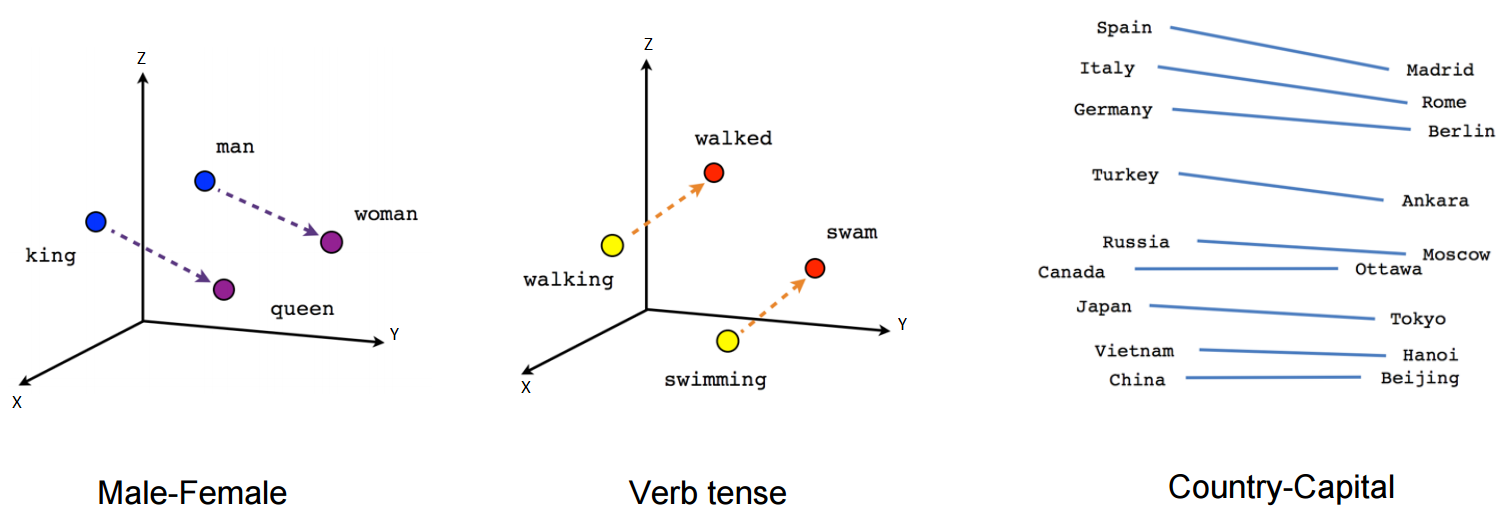

In [4]:
from IPython.display import Image
Image(filename='w2v2.png')

Benzer olarak bu grafikte 3 boyutlu bir zuaya indirgenmiş gröselleştirmeler görülebilir.

* Soldaki grafikte, **man** ve **woman** kelimeleri z ekseninde aynı yükseklikte, aynı şekilde **woamn** ve **queen** kelimleri de birbirleri ile aynı yükserkliktedirler. Bu sebeple, z ekseninin cinsiyet belirttiğini düşünebiliriz.
* Yukarıda da bahsedildiği gibi, benzer olarak, zıt cinsiyetleri belirten kelimelerY ekseninde birbirleri ile aynı mesafededir.
* X eksenininde ise **royalty** özelliğinin yerleşimleri görülüyor. Burada da **man** ve **king** ile **woman** ve **queen** birbirileri ile aynı uzaklıktadırlar.

Ortadaki grafikte ise farklı zaman belirten kelimelerin birbirlerine kıyasla ifade ettikleri anlamlara göre yerleşimleri görülmektedir.

### Genel Nitelikler:

* Vektörlerin oluşturulması için cümlelerden oluşan bir **Corpus (Kelime Haznesi)**'a ihtiyaç vardır.
* Kelimelerin farklı cümlelerdeki kullanımlarına göre yakınlaklarını tespit eden bir algoritma kullanılır. Bu sayede her kelimeye bir vektör atanır.
* Kelime vektörleri kullanılan **Corpus**'a göre değişiklik gösterebilir. Örneğin Haber metinleri kullanılarak ahzırlanan bir Word2Vec modeli ile Tweetlerden veya Ansiklopedi verilerinden hazırlanan bir Word2Vec modeli, Örn. **Siyaset** kelimesine aynı vektörü atamayabilir. Örneğin, bir siyasi parti ismi Tweetler kullanılarak eğitilen bir modelde negatif veya pozitif kutuplu anlam çıkarabilir ve Ansiklopedi verilerinden hazırlanan bir Wor2Vec modeli aynı siyasi parti için Nötr anlam çıkarabilir.
* Vektör boyutları farklılık gösterilebilir. Word2Vec'te her kelime için Standart vektör boyutu 300 olarak kullanılır. Ancak istenildiği zaman değiştirilebilir. Bu vektörün boyutu, çoğunlukla eldeki verinin büyüklüğüne bağlıdır.
* Kelimlerin Vektörel olarak ifade edilmesinin en büyük avantajı, yukarıdaki örneklerde gördüğümüz gibi **cat** ve **kitten** gibi ifadelerin Kosinüs benzerliği yüksek vektörler ortaya çıkarmasıdır. Bu sayade bir yapay zeka modeli eğitilirken, model **cat** kelimesinden öğrendiği bilgiyi, **kitten** kelimesinde de uygulayabilir.

# Sentence Embedding

Yukarıda açıklanan Word2Vec, bir Text Representation yöntemidir. Buna benzer bir çok farklı yöntem bulunmaktadır. Ancak bu yöntemlerin çoğu vektörleri kullanarak kelimleri/cümleleri temsil etmektedir.

Word2Vec metodunda her kelime için farklı bir vektör oluşturuluyordu, **Sentence Embedding** ise bir cümlenin bütünün, kelime sayısı fark etmeksizin numerik olarak temsil edilmesidir. Genellikle tek bir vektörden oluşur.

**Sentence Embedding**'in önemi, cümlenin bağlamını(context) da içermesidir. 

Örneğin, sesteş (eş sesli) bir kelime olan **Yüz** kelimesini ele aldığımızda, cümlede kuıllanımına göre bir *miktar* veya bir *organ* veya bir *fiil (yüzmek)* belirtebilir. Word2Vec modelinde, **Yüz** kelimesi için, modelin eğitildiği corpus'a (kelime haznesi) bağlı olarak bir vektör atanacaktır ve başka bir veride kullanıldığında, bağlam fark etmeksizin her zaman aynı vektöre sahip olacaktır.

* "Buraya **yüz** kere geldim"

ile

* "Kumsala yakın **yüz** dedim sana!"

cümlelerinde **Yüz** kelimesi farklı bir anlam belirtirken, Word2Vec modelinde aynı vektöre sahip olacaktır.

**Sentence Embedding** ise bu vektörlerin bağlamını (context) tespit edip birbirlerinden benzerliği olmayan (veya çok az olan) iki farklı vektör oluşturacaktır.

### Bu durumu örnekler ile göstermek daha faydalı olacaktır:

In [1]:
from sentence_transformers import SentenceTransformer, util
import numpy as np
import os
import csv
import pickle
import time
model = SentenceTransformer('distiluse-base-multilingual-cased')

Yukarıda örneğini vertdiğmiz 
* **Buraya yüz kere geldim**

ve 

* **Kumsala yakın yüz dedim** 

cümleleri için **Sentence Embedding** oluşturalım:

In [44]:
cümle_1 = model.encode("Buraya yüz kere geldim")
cümle_2 = model.encode("Kumsala yakın yüz dedim")

Bu modelde **Sentence Embnedding** için vektör uzunlukları 512 olarak belirlenmiştir.

In [45]:
print("Vektör Uzunluğu:",len(cümle_1))
print(cümle_1)

Vektör Uzunluğu: 512
[ 2.40900274e-02  1.19505841e-02  2.30297949e-02  8.87068547e-03
 -3.01123341e-03 -3.32172140e-02 -2.55911686e-02 -2.84639536e-03
 -5.80214672e-02  1.16706425e-02 -1.09724225e-02 -2.14965735e-02
 -2.01920699e-03  3.42204701e-03  7.62005290e-03  2.41464023e-02
  5.70624368e-03  9.88670066e-03  2.35436261e-02  2.02406067e-02
 -4.93273474e-02  3.18831950e-02 -1.24344928e-02  1.71466023e-02
  4.81941849e-02  4.08485122e-02 -1.03276698e-02 -2.85904724e-02
  2.83201388e-03 -1.18005546e-02 -5.13757169e-02  3.50094475e-02
  2.09531896e-02 -1.91960484e-02 -4.73403931e-03 -5.52146398e-02
 -6.69175107e-03 -9.01556294e-03  2.56453045e-02  6.42870814e-02
  6.56180922e-03 -1.87192075e-02  2.25563720e-02 -4.28399350e-03
  3.35489251e-02  3.34759578e-02  6.23324746e-03 -1.64001286e-02
 -2.52644066e-04  1.58078987e-02  2.25981721e-03 -5.46585815e-03
 -1.34147555e-02 -2.75821351e-02 -1.59288086e-02  2.15599742e-02
 -2.07840297e-02 -1.17642563e-02 -3.78805548e-02 -4.59833033e-02
  2.

In [46]:
# İki vektörün birbirine uzaklığını hesaplamak için
from scipy import spatial

In [47]:
# Kosinüs Benzerliği = 1 - iki vektörün birbirine uzaklığı
1 - spatial.distance.cosine(cümle_1, cümle_2)

0.3507169485092163

Bu iki cümle için oluşturulan vektörlerin kosinüs benzerliği %35'tir ve düşük bir orandır.

Başka bir örnek için;

* **Kedi ağaçtan atlayınca ayağı kırılmış**

ve 

* **Kaplan ağaçtan atlayınca ayağı kırılmış**

cümlelerini ele alalım:

In [48]:
cümle_1 = model.encode("Kedi ağaçtan atlayınca ayağı kırılmış")
cümle_2 = model.encode("Kaplan ağaçtan atlayınca ayağı kırılmış")

In [49]:
# Kosinüs Benzerliği = 1 - iki vektörün birbirine uzaklığı
1 - spatial.distance.cosine(cümle_1, cümle_2)

0.8770985007286072

Kedigil familyasından iki hayvan için aynı durum değerlendirildiğinde vektörlerin benzerliği %87.7 oranında epey yüksek çıkıyor.

Aynı durumu Kedi-Köpek karşılaştırması olarak yapacak olursak:

In [52]:
cümle_1 = model.encode("Kedi ağaçtan atlayınca ayağı kırılmış")
cümle_2 = model.encode("Köpek ağaçtan atlayınca ayağı kırılmış")

# Kosinüs Benzerliği = 1 - iki vektörün birbirine uzaklığı
1 - spatial.distance.cosine(cümle_1, cümle_2)

0.7502996325492859

Bu sefer benzerlik görece daha düşük çıkıyor ancak yine de bağlam (context) aynı olduğu için yüksek bir değer çıkıyor.

*Not: %70 üzeri değerler genellikle yüksek olarak değerlendirilir ancak **cutoff** noktası için belirlenecek değer eldeki veriye göre farklılık gösterebilir.*

# Sentence Transformer

Yukarıda örnek verilen model **sentence transformer** kütüphanesinden gelmektedir.

Kullanılan bu metod, Bert modelinden türemiştir.

Bert modeli, Doğal Dil İşleme alanında kullanılmak için geliştirilen, State-of-the-Art bir dil modelidir.

Burada Bert modelinin detayları anlatılmayacaktır. Ancak Bert için kullanılan **Word Representation** metodu üzerinden birkaç açıklama yapılacaktır. Bert için kullanılan vektörel temsil etme yönteminden **Tokenizer** olarak bahsedilecektir.

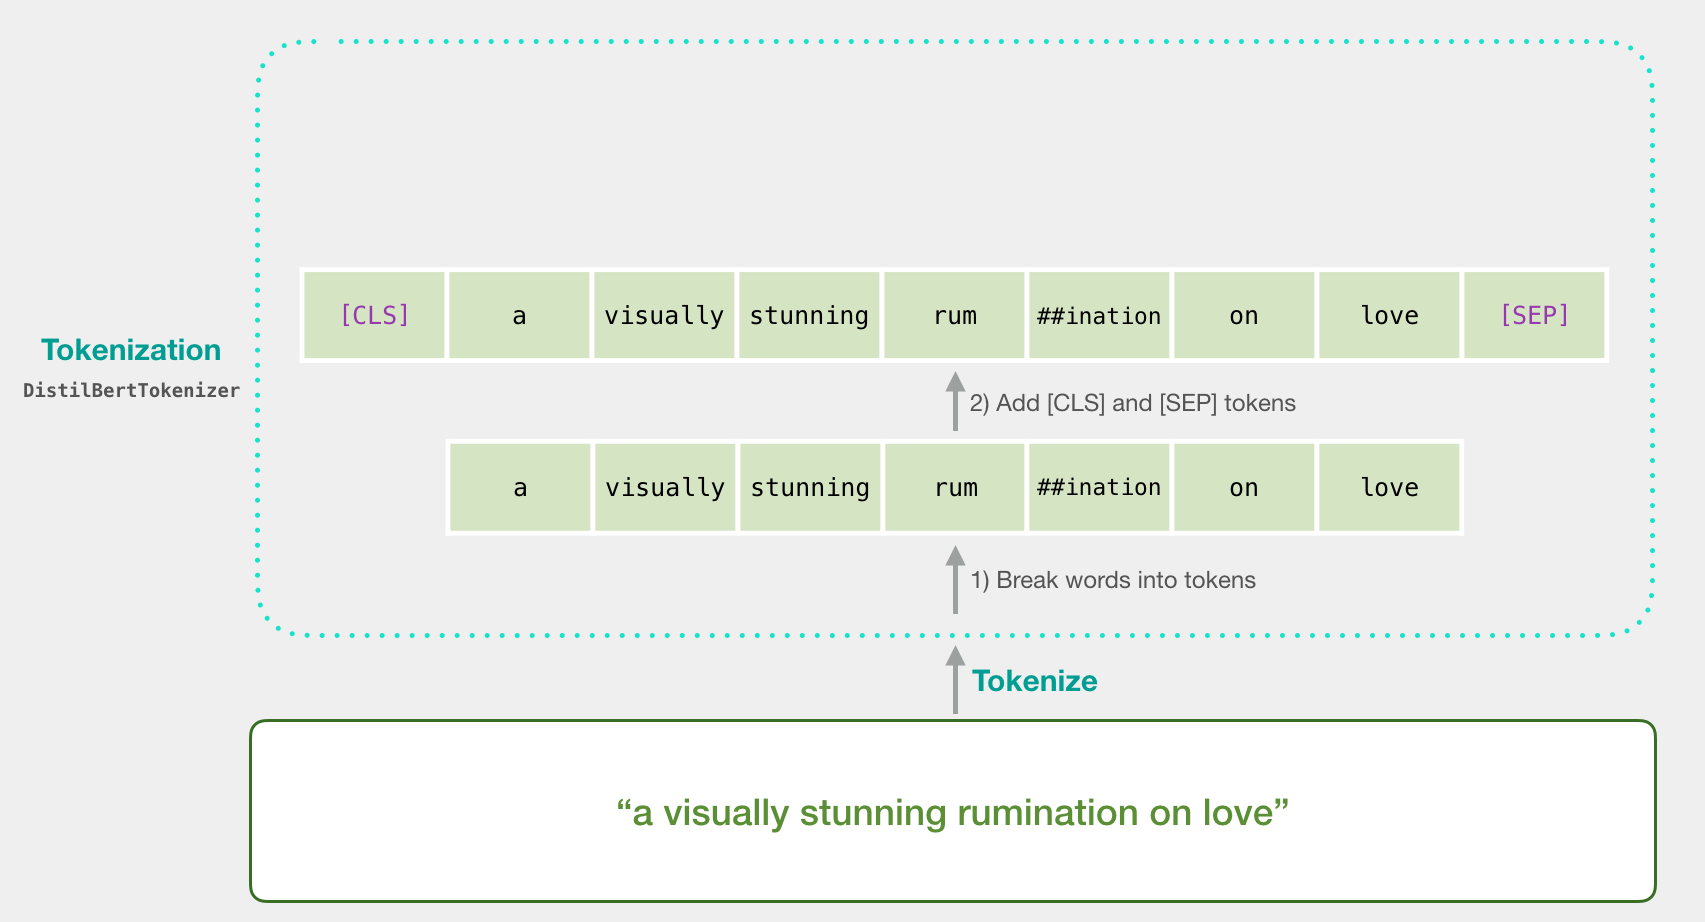

In [21]:
from IPython.display import Image
Image(filename='bert-distilbert-tokenization-1.png')

Yukarıdaki görselde görüldüğü gibi, Bert Tokenizer'ı kelimeleri vektörlere çevirmeden önce, yukarıdaki **rumination** kelimesinde görüldüğü gibi kelimeleri **Token**lere ayırmaktadır.

Bunun sebebi Bert Tokenizer'ının sabit bir **corpus** kullanılarak eğitilmesidir. Bu sabit **corpus** Wikipedia ve Haber metinleri gibi milyonlarca cümleden oluşan çok geniş bir corpus'tur.

Bu tokenizer için kelime haznesi olarak bahsedilen **corpus**taki en sık kullanılan 50.000 kelime kullanılmıştır. Bu yüzden bir cümleyi Bert Tokenizer ile işlemek istediğimizde, eğer cümle içerisindeki kelimelerden biri, tokenizer'ın kelime haznesinde mevcut değilse, bu kelimeyi, kelime haznesinde mevcut olan diğer keliemelere bölerek tokenler oluşturmaktadır.

Buna ek olarak Bert modeli, yukarıdaki görselde görüldüğü gibi özel bir token olan **[CLS]** tokenini kullanmaktadır. Tokenizer, bu tokeni cümlenin bağlamına (context) göre her cümle için özel olarak oluşturmaktadır.

Bu **[CLS]** tokeni, tek başına bir **Sentence Embedding** vektörü olarak düşünülebilir. Ancak Bert Tokenizer'ı, algoritmasının eşsiz yapısı nedeniyle bir cümleye her zaman aynı **[CLS]** tokenini vermemektedir.

Yukarıda kullandığımız **Sentence Transformer** kütüphanesi ise, Bert ve benzeri modellerin özel **[CLS]** tokenlerinin, her defasında aynı vektörü oluşturması için **Fine-Tune*** edilmiş modeller içermektedir.

**Fine-Tune işlemi, bir modelin spesifik bir task (görev) için eğitilmesidir.*

*Not: Yuakrıdaki görseldeki **[SEP]** tokeni, cümlenin bittiğini ifade eden bir başka özel tokendir*

# Bu metodun ilan verilerine uygulanması:

Verimizde bulunanlar ilanlar birden fazla cümleden oluşmaktadır, ancak kullanacağımız model, tek seferde *maksimum* 128 token kullanarak **Sentence Embedding** oluşturabilmektedir. 10 kelimelik bir cümle minimum 10 tokenden oluşacaktır (her cümle bir token olur) veya kelime haznesinde olmayan kelimeler varsa 10'dan fazla tokene bölünecektir.

Bu yüzden ilanlar her cümle ayrı bir girdi olacak şekilde ayrılmıştır. Ardından her cümlenin **Sentence Embedding**'i oluşturulmuş ve aynı ilana tekabül eden cümlelerin **Sentence Embedding Vektörlerinin** ortalaması alınmıştır. İlanlar vektörel olarak bu şekilde temsil edilmiştir.

Ardından 499 ilan için oluşturulan 499 vektör için hiyerarşik kümeleme yöntemi kullanıldı. Bu sayede, benzer özellikleri (boyutları) içeren vektörlerden birer küme oluşturulmuş ve ilanlar toplamda 10 küme olacak şekilde gruplandırılmıştır.

Bu yöntem, özellikle vektörlerin ortalamasının alınması durumu, oldukça deneysel bir yöntem olup kesin bir geçerliliği yoktur. Bu projede ilanları gruplamak istediğim için, bu gruplamayı el ile yapmak yerine daha ilerici bir yöntemi denemek istedim. Yöntemin geçerliliğinin tespit edilmesi, ne kadar iyi gruplama yaptığı, aşağıdaki analizlerde daha net bir şekilde görülecektir.

Örnek veri aşağıdaki şekildedir:

In [23]:
import pandas as pd
df = pd.read_excel("ilan_metinDF.xlsx")

In [24]:
df

,ilan_id,pozisyon,pozisyon_kisa,cumleler
0,1,Fiyat Araştırma Proje Uzman Yardımcısı,veri analisti,genel nitelikler ve is tanimi
1,1,Fiyat Araştırma Proje Uzman Yardımcısı,veri analisti,universitelerin ekonometri istatistik matemati...
2,1,Fiyat Araştırma Proje Uzman Yardımcısı,veri analisti,alanında en az 1 yıl is deneyimine sahip
3,1,Fiyat Araştırma Proje Uzman Yardımcısı,veri analisti,ms office uygulamalarına ozellikle ileri derec...
4,1,Fiyat Araştırma Proje Uzman Yardımcısı,veri analisti,tercihen iyi derecede ingilizce bilen
...,...,...,...,...
10170,499,Veri Bilimci,veri analisti,makine ogrenmesi yontemleri alanında modelleme...
10171,499,Veri Bilimci,veri analisti,acık kaynak yazılım teknolojilerini ve literat...
10172,499,Veri Bilimci,veri analisti,literatur takip edebilecek seviyede ingilizce ...
10173,499,Veri Bilimci,veri analisti,analitik dusunen sonuc odaklı calısan ve takım...


Verideki **cumleler** sütunundaki her cümle için **Sentence Embeddinng** oluşturuluyor:

In [25]:
corpus_embedding = model.encode(df["cumleler"], show_progress_bar=True, convert_to_numpy=True)

Ardından verideki **ilan_id** sütunu kullanılarak her vektör ait olduğu ilana endekslenmiştir ve ilan için oluşturulan vektörlerin ortalaması alınmıştır.

In [26]:
ilan_dict = {}

for id in df["ilan_id"].unique():
    ilan_dict["{}".format(id)] = corpus_embedding[list(df[df["ilan_id"]==id].index)]

In [36]:
averages = []
for id in ilan_dict:
    avg = np.add.reduce(ilan_dict[id])/len(ilan_dict[id])
    averages.append(avg)

Vektörlerin kümelenmesi için Python'un SciKit-Learn kütüphanesinde bulunan **Agglomerative Clustering (Hiyerarşik Kümeleme)** modeli kullanılmıştır.

Bununla beraber **K-Means** yöntemi de denendi ancak **Hiyerarşik Kümeleme** yönteminin daha iyi çalıştığı gözlendi.

In [37]:
from sklearn.cluster import AgglomerativeClustering

Cluster sayısı olarak **10** seçildi.

Yöntem olarak **euclidean** ve **Ward Linkage** seçildi.



In [38]:
%%time
cluster = AgglomerativeClustering(n_clusters=10,affinity="euclidean",linkage="ward")

# iterasyondaki veri için fit ediyoruz
cluster.fit(averages)

Wall time: 264 ms


AgglomerativeClustering(n_clusters=10)

Her vektörün (ilanın) ait olduğu küme:

In [39]:
cluster.labels_

array([0, 1, 0, 1, 1, 8, 5, 8, 8, 1, 7, 3, 1, 7, 0, 0, 1, 0, 0, 1, 1, 3,
       1, 1, 1, 0, 0, 7, 7, 5, 1, 7, 6, 0, 7, 0, 7, 7, 7, 0, 1, 7, 1, 1,
       7, 0, 0, 0, 1, 0, 7, 0, 7, 0, 1, 7, 7, 7, 7, 7, 0, 7, 6, 7, 7, 2,
       2, 2, 0, 1, 7, 7, 1, 1, 0, 0, 3, 7, 7, 1, 7, 7, 7, 1, 7, 7, 7, 7,
       4, 3, 1, 5, 1, 1, 7, 1, 7, 1, 0, 7, 1, 1, 7, 2, 2, 7, 7, 2, 0, 7,
       7, 7, 2, 6, 4, 7, 1, 8, 1, 0, 1, 9, 9, 3, 3, 6, 3, 1, 3, 3, 3, 3,
       1, 3, 0, 0, 9, 1, 3, 8, 8, 0, 8, 8, 8, 8, 8, 2, 8, 0, 2, 8, 8, 8,
       5, 0, 1, 1, 8, 1, 8, 8, 2, 2, 8, 2, 0, 4, 0, 3, 4, 6, 7, 8, 2, 5,
       0, 1, 1, 4, 4, 0, 0, 1, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 9, 1, 0,
       6, 0, 0, 0, 1, 0, 2, 0, 0, 3, 3, 0, 3, 0, 3, 0, 1, 7, 0, 0, 4, 1,
       8, 0, 0, 8, 3, 0, 0, 8, 7, 8, 8, 8, 8, 8, 0, 0, 8, 1, 8, 8, 9, 0,
       9, 8, 8, 0, 8, 0, 3, 8, 8, 0, 8, 8, 8, 8, 8, 0, 8, 0, 1, 1, 0, 0,
       5, 0, 1, 9, 0, 5, 2, 0, 0, 0, 7, 1, 3, 8, 5,

Bu işlemin ardından orjinal verimize geri dönüyoruz ve ilanların hangi gruba (kümeye) ait olduğunu belirten yeni bir sütun oluşturuyoruz:

In [40]:
import pandas as pd
df_main = pd.read_excel("mainnn.xlsx")

In [41]:
df_main["cluster"] = list(cluster.labels_)

İlanlardaki pozisyon isimleri kullanılarak kümelerin incelenmesi:

In [43]:
for küme_id in df_main["cluster"].unique():
    print("Küme {}:".format(küme_id+1))
    print(df_main.loc[df_main['cluster'] == küme_id]["pozisyon"])
    print()

Küme 1:
0            Fiyat Araştırma Proje Uzman Yardımcısı
2                           Aktüerya Kıdemli Uzmanı
14                                       CRM Uzmanı
15                           Dijital Dönüşüm Müdürü
17                               Veri Analiz Uzmanı
                           ...                     
481    Ticaret ve Piyasa İşlemleri Uzman Yardımcısı
487          Operasyonel Mükemmellik Kıdemli Uzmanı
489                            Proje Yönetim Uzmanı
492          Stratejik Planlama ve Raporlama Uzmanı
493            Kurumsal Verimlilik ve Analiz Müdürü
Name: pozisyon, Length: 153, dtype: object

Küme 2:
1             Aktüeryal Raporlama Uzmanı
3      Aktüeryal Rezerv Müdür Yardımcısı
4                Aktüeryal Rezerv Uzmanı
9                       Raporlama Uzmanı
12                         Veri Analisti
                     ...                
490                        Data Analisti
491      Master Data Veri Analizi Uzmanı
496                       Data Scientist